# Detectie van gezichten met CNNs

### 
Notebook By Stijn Oomes adapted by Michiel Bontenbal


https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

### Contents
0. Installeer packages en importeer libraries
1. Importeer foto
2. Detect faces with Haar Cascade
3. Multi-Task Cascaded Convolutional Neural Network


## 0. Install packages and import libraries

Importeer de relevante libraries.

`opencv` en wellicht `matplotlib`

Hint: `imread`, `imshow`

In [2]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 8.9 MB/s eta 0:00:01


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [6]:
print(cv.__version__)

4.6.0


In [ ]:
!pip install mtcnn

## 1. Importeer en toon afbeelding

Zoek een kleuren foto met 5 tot 10 gezichten.

Laad de afbeelding in. Welk datatype heeft de ingeladen afbeelding?


 Laat de foto op het scherm zien. Hoeveel gezichten zie jij?

In [6]:
!curl 'https://klasvanjuflinda.nl/wp-content/uploads/2018/08/shutterstock_735971812.jpg' -o groep.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  236k  100  236k    0     0  1780k      0 --:--:-- --:--:-- --:--:-- 1795k


<class 'numpy.ndarray'>
(667, 1000, 3)


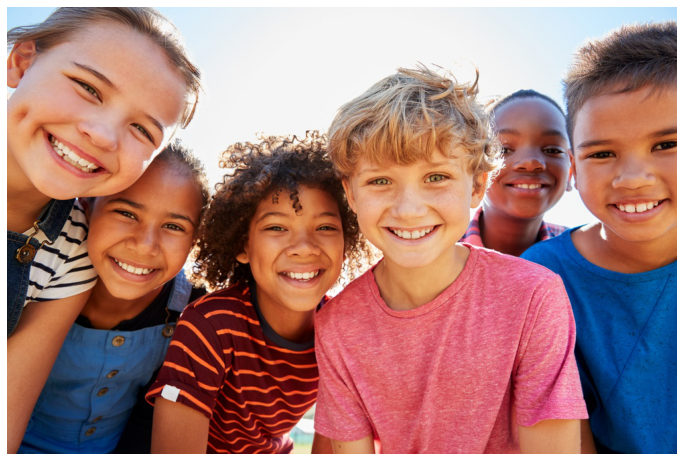

In [8]:
img = plt.imread('groep.jpg') # geen .png, dan gaat het verderop mis
print(type(img))
print(img.shape)
plt.figure(figsize=(12,10))
plt.imshow(img);
plt.axis('off');

In [9]:
img[0,0,:].dtype

dtype('uint8')

## 2. Detect faces with Haar cascade in OpenCV

The first face detection was performed in 2001 bij Viola and Jones. It uses a technology named after Hungarian mathematician Alfred Haar. 
https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework

Vind de .xml file met de classifier: haarcascade_frontalface_default.xml

Initieer de Cascade Classiefier.

In [14]:
!curl 'https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'

<?xml version="1.0"?>
<!--
    Stump-based 24x24 discrete(?) adaboost frontal face detector.
    Created by Rainer Lienhart.

////////////////////////////////////////////////////////////////////////////////////////

  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.

  By downloading, copying, installing or using the software you agree to this license.
  If you do not agree to this license, do not download, install,
  copy or use the software.


                        Intel License Agreement
                For Open Source Computer Vision Library

 Copyright (C) 2000, Intel Corporation, all rights reserved.
 Third party copyrights are property of their respective owners.

 Redistribution and use in source and binary forms, with or without modification,
 are permitted provided that the following conditions are met:

   * Redistribution's of source code must retain the above copyright notice,
     this list of conditions and the following disclaimer.

   * Redistributio

            <right_val>-1.5988600254058838</right_val></_></_>
        <_>
          <!-- tree 19 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>5 10 18 2 -1.</_>
                <_>5 11 18 1 2.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>4.4970000162720680e-003</threshold>
            <left_val>-0.5203430056571960</left_val>
            <right_val>0.3782829940319061</right_val></_></_>
        <_>
          <!-- tree 20 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>6 0 12 6 -1.</_>
                <_>6 2 12 2 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>2.7699999045580626e-003</threshold>
            <left_val>-0.5318260192871094</left_val>
            <right_val>0.2495100051164627</right_val></_></_>
        <_>
          <!-- tree 21 -->
          <_>
            <!-- root node -->
   

            <left_val>-0.2501359879970551</left_val>
            <right_val>0.1597869992256165</right_val></_></_>
        <_>
          <!-- tree 34 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>5 0 6 9 -1.</_>
                <_>7 0 2 9 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>0.0100980000570416</threshold>
            <left_val>0.0437389984726906</left_val>
            <right_val>-0.6998609900474548</right_val></_></_>
        <_>
          <!-- tree 35 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>12 0 6 9 -1.</_>
                <_>14 0 2 9 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>-0.0209470000118017</threshold>
            <left_val>-0.9413779973983765</left_val>
            <right_val>0.2320400029420853</right_val></_></_>
        <_>
          <!-- tree 36 -->
         

            <left_val>-0.5217720270156860</left_val>
            <right_val>0.0337349995970726</right_val></_></_>
        <_>
          <!-- tree 71 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>10 6 4 18 -1.</_>
                <_>12 6 2 9 2.</_>
                <_>10 15 2 9 2.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>-0.0188159998506308</threshold>
            <left_val>0.6518179774284363</left_val>
            <right_val>1.3399999588727951e-003</right_val></_></_>
        <_>
          <!-- tree 72 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>7 3 6 11 -1.</_>
                <_>9 3 2 11 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>-5.3480002097785473e-003</threshold>
            <left_val>0.1737069934606552</left_val>
            <right_val>-0.3413200080394745</right_val></_></_>

          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>0 4 3 19 -1.</_>
                <_>1 4 1 19 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>0.0117250001057982</threshold>
            <left_val>-0.1934649944305420</left_val>
            <right_val>0.4665670096874237</right_val></_></_>
        <_>
          <!-- tree 117 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>19 1 3 18 -1.</_>
                <_>20 1 1 18 3.</_></rects>
              <tilted>0</tilted></feature>
            <threshold>1.5689999563619494e-003</threshold>
            <left_val>-8.2360003143548965e-003</left_val>
            <right_val>0.2570089995861054</right_val></_></_>
        <_>
          <!-- tree 118 -->
          <_>
            <!-- root node -->
            <feature>
              <rects>
                <_>2 1 3 18 -1.</_>
                <_>3 1 

In [13]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
# face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Is de classifier leeg? --> " + str(face_cascade.empty()))

Is de classifier leeg? --> False


In [14]:
#Zet de foto om naar grijswaarden
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Bepaal met de classiefier de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [15]:
#run de haar cascade
haar_faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(10, 10),
        flags=cv.CASCADE_SCALE_IMAGE)

print(f"Aantal gezichten: {haar_faces.shape[0]}")

Aantal gezichten: 1


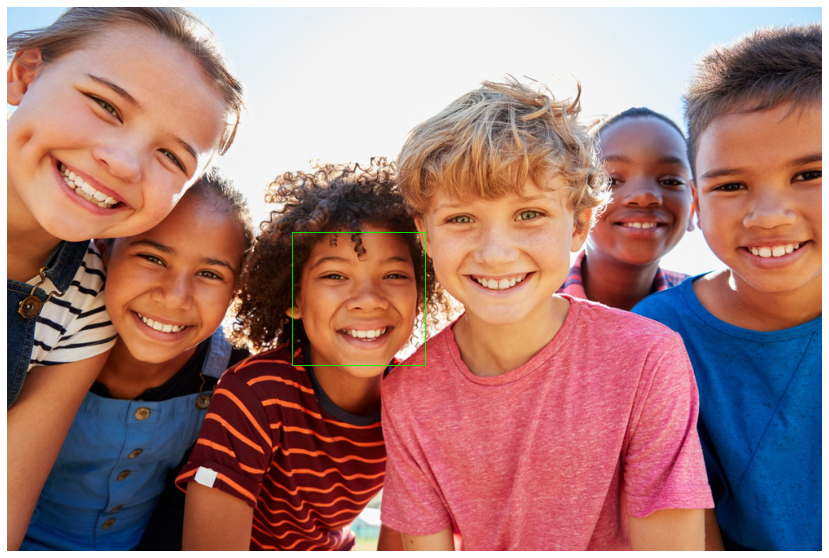

In [16]:
#toon de rechthoeken rondom de gezichten
for (x,y,w,h) in haar_faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    
plt.figure(figsize=(15,10))
plt.imshow(img);
plt.axis('off');

## 3. Multi-Task Cascaded Convolutional Neural Network

In [20]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [21]:
filename = 'groep.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
mtcnn_faces = detector.detect_faces(pixels)

print("Aantal gezichten: " + str(len(mtcnn_faces)))

2022-10-14 16:11:15.951718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 119ms/step
Aantal gezichten: 6


In [22]:
mtcnn_faces[0]

{'box': [121, 230, 160, 210],
 'confidence': 0.9999419450759888,
 'keypoints': {'left_eye': (176, 307),
  'right_eye': (246, 327),
  'nose': (205, 367),
  'mouth_left': (150, 369),
  'mouth_right': (228, 390)}}

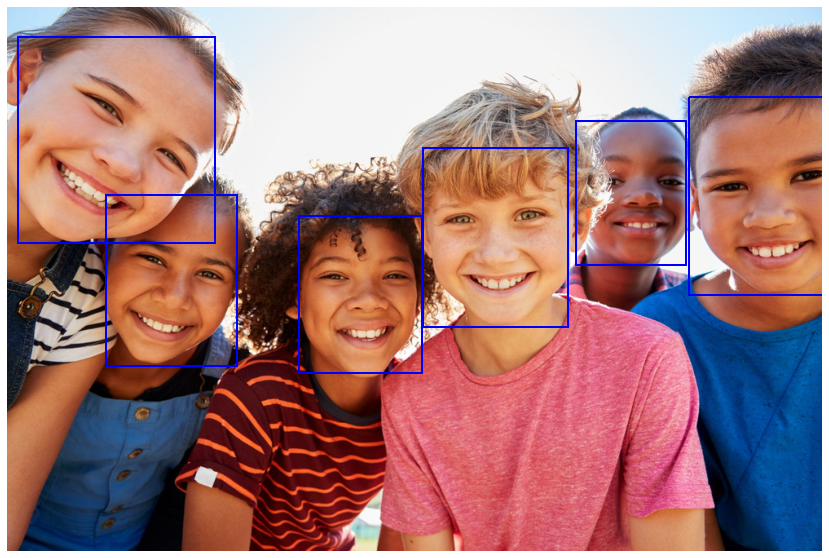

In [23]:
def draw_image_with_boxes(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='blue',linewidth=2.0)
        ax.add_patch(rect)
        
    plt.show()


draw_image_with_boxes(pixels, mtcnn_faces)

**OPDRACHT**: evalueer de verschillen tussen de Haar Cascade classifier en de MTCNN detector.

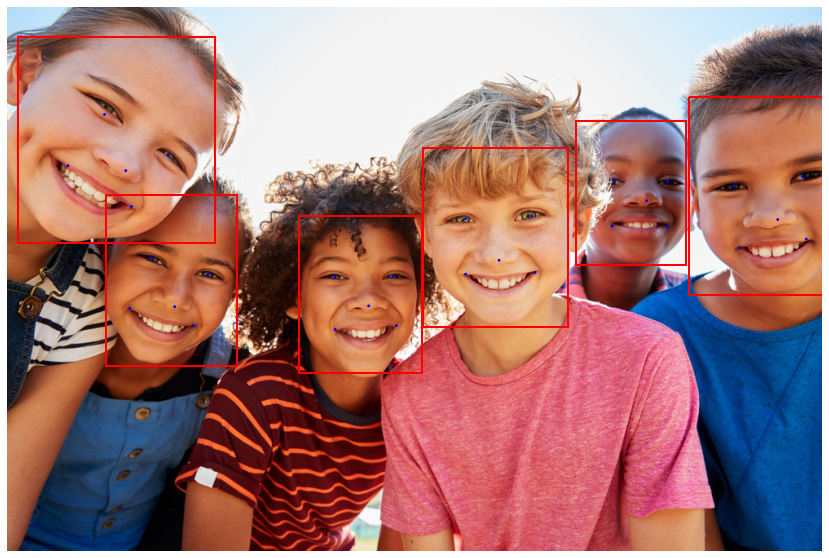

In [24]:
def draw_faces(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=1.1, color='blue')
            ax.add_patch(dot)
            
    plt.show()

draw_faces(pixels, mtcnn_faces)

## 4. Face detection with Keras (issue, can't solve)

In [22]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=b22bc24d5cafd83227adf977c1afdae0b6612729fb2e9c33a72c7067a4e3e679
  Stored in directory: /Users/michielbontenbal/Library/Caches/pip/wheels/b8/79/f0/b523d25d96b0bbb12bb024b97940d08c4fcd498a00070c8d82
Successfully built gdown


In [24]:
!gdown --id 1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1

/Users/michielbontenbal/opt/anaconda3/lib/python3.9/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
To: /Users/michielbontenbal/Documents/GitHub/Notebooks/facenet_keras.h5
100%|██████████████████████████████████████| 92.4M/92.4M [00:04<00:00, 19.2MB/s]


In [28]:
ls | grep \.h5

facenet_keras.h5
yolo-tiny.h5


In [31]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
#print(model.inputs)
#print(model.outputs)

ValueError: bad marshal data (unknown type code)